# Importing libraries and defining classes and functions

Welcome to $B, \tau, \nu$ Analysis.

This notebook is developed in order to make an Analysis for MC simulations for final state $b_{jet}, \tau_h, p_T^{miss}$. 
In this first section a user only must care about giving the path direction for storing the histograms and de DataFrames in a .csv format.

The path is declared in the first line of the second code cell, just before the `RootTreeReader`.

Once the user had made that, the resulting files will be uploaded in the path.

In [ ]:
!pip install uproot
!pip install awkward
!pip install mplhep

     |████████████████████████████████| 298 kB 5.2 MB/s 
     |████████████████████████████████| 11.7 MB 3.3 MB/s 
     |████████████████████████████████| 5.8 MB 547 kB/s 
     |████████████████████████████████| 11.2 MB 50.7 MB/s 
     |████████████████████████████████| 899 kB 64.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# **Por favor dele restart runtime justo arriba, gracias**

# **Ahora sí, prosiga**

In [ ]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
dpkg-dev set to manually installed.
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.9).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.4).
libx11-dev set to manually installed.
The following additional packages will be installed:
  binutils-common binutils-x86-64-linux-gnu libapr1 libaprutil1 libbinutils
  libserf-1-1 libsvn1
Suggested packages:
  binutils-doc db5.3-util libapache

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!tar -xf /content/drive/Shareddrives/PyROOT_in_Google/root_build_google_yikes.tar

In [ ]:
!ls -ltrh

total 68K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Mar  9 14:48 sample_data
drwx------  6 root root 4.0K Mar 24 02:31 drive
-rw-------  1 root root  50K Mar 24 03:42 Processor.py
drwxr-xr-x  2 root root 4.0K Mar 24 03:42 __pycache__


In [ ]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [ ]:
#Coping an script were are all the functions needed for the analysis in the colaboratory content
!cp /content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/Processor.py /content

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import awkward
import mplhep as hep
from array import array
import Processor as pr
import ROOT
hep.style.use("CMS")

Welcome to JupyROOT 6.14/04


In [ ]:
#Loading signals and backgrounds
#Df_s1 = pd.read_csv("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/SSM_600GeV.csv", index_col="Unnamed: 0")
#Df_s2 = pd.read_csv("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/SSM_1000GeV.csv", index_col="Unnamed: 0")
#Df_s3 = pd.read_csv("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/SSM_1600GeV.csv", index_col="Unnamed: 0")

Df_s1 = pd.read_csv("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/SSM_2000GeV.csv", index_col="Unnamed: 0")
Df_s2 = pd.read_csv("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/SSM_2500GeV.csv", index_col="Unnamed: 0")
Df_s3 = pd.read_csv("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/SSM_3000GeV.csv", index_col="Unnamed: 0")

Df_bg_wj = pd.read_csv("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/W_plus_jets.csv", index_col="Unnamed: 0")
Df_bg_zj = pd.read_csv("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/Z_plus_jets.csv", index_col="Unnamed: 0")
Df_bg_ttbar = pd.read_csv("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/tt_bar.csv", index_col="Unnamed: 0")

# Roots

In this section the `.root` files to be read are selected. The files are divided into signals, and 3 different background types, produced in order to have the maximun probbility to have a $b_{jet}, \tau$ and $p_t^{miss}$ in the final state.

The first cell declares the paths to the files, and the second and the thirdone read those paths for signals and background, and turn them into pandas DataFrames.

# Selecting the $b_{jet}$ and the $\tau_h$ per event

Here the selection is made. The criteria is to find the events that have at least one jet tagged as a $\tau$, and another one tagged as a $b$. The information of those two jets are storaged in another dataframe with the information of the $p_T^{miss}$ per event.

The selection is made sepparately for each signal and for each background.

The first cell makes this selection. The second saves the Dataframes into `.csv` files. The third one can read these files.

The fourth cell declares the cross section of the process starting for the signal and then the backgrounds. These cross section must be declared in order $s_1, s_2, s_3, t\bar{t}, W + jets, Z + jets$. The labels in the sixth cell, which are the name for the events must be declared in that same order.

In [ ]:
Luminosity = 150

#sigma = np.array([5.25, 0.45, 0.03, (5.046960e+02), (0.642517126417),(0.025330271375)])*1e-12
sigma = np.array([0.01223, 0.00375, 0.00139, (5.046960e+02), (0.642517126417),(0.025330271375)])*1e-12
#Number of events expected per process
n_ev = sigma * Luminosity /(1e-15)

#Number of montecarlo events analyzed
n_mc = np.array([50000,50000,50000, 
                 24307250, 350495, 106191])
#Weights 
w = n_ev / n_mc
ex_ev_s = pd.Series(data = w,
                    index = ['S2 TeV', 'S2.5 TeV', 'S3 TeV', 'Bg_TTbar', 'Bg_WJ', 'Bg_ZJ'])
                    #index = ['S600GeV', 'S1000GeV', 'S1600GeV', 'Bg_TTbar', 'Bg_WJ', 'Bg_ZJ'])



print(ex_ev_s)

S2 TeV      0.036690
S2.5 TeV    0.011250
S3 TeV      0.004170
Bg_TTbar    3.114478
Bg_WJ       0.274976
Bg_ZJ       0.035780
dtype: float64


In [ ]:
#Lables for the plotting
labels = [r"$m_{W'} = 600GeV$",
          r"$m_{W'} = 1000GeV$", 
          r"$m_{W'} = 1600GeV$", 
          r"$t\,\bar{t}$",
          r"W + jets semi",
          r"Z + jets semi"]
labels = [r"$m_{W'} = 2 TeV$",
          r"$m_{W'} = 2.5 TeV$", 
          r"$m_{W'} = 3 TeV$", 
          r"$t\,\bar{t}$",
          r"W + jets semi",
          r"Z + jets semi"]

ind = ['S2 TeV', 'S2.5 TeV', 'S3 TeV', 'Bg_TTbar', 'Bg_WJ', 'Bg_ZJ']
#ind = ['S600GeV', 'S1000GeV', 'S1600GeV', 'Bg_TTbar', 'Bg_WJ', 'Bg_ZJ']

# Straight cuts and Significance

In this section the best cuts for maximizing the statistical significance is made. Three variables are considered in this analysis.

1. $p_T(\tau)$
2. $\Delta\phi(\tau,p_T^{miss})$
3. $p_T^{miss}$

In [ ]:
#N0_mc = n_mc.copy()
N0_mc = pd.Series(n_mc.copy(),
                  index = ind)
N0_mc

S600GeV        50000
S1000GeV       50000
S1600GeV       50000
Bg_TTbar    24307250
Bg_WJ         350495
Bg_ZJ         106191
dtype: int64

In [ ]:
#Initial cults
Df_s1 = pr.final_cuts(Df_s1, pt_tau=25, pt_b=20, del_phi = 0, met = 0)
Df_s2 = pr.final_cuts(Df_s2, pt_tau=25, pt_b=20, del_phi = 0, met = 0)
Df_s3 = pr.final_cuts(Df_s3, pt_tau=25, pt_b=20, del_phi = 0, met = 0)
Df_bg_wj = pr.final_cuts(Df_bg_wj, pt_tau=25, pt_b=20, del_phi = 0, met = 0)
Df_bg_zj = pr.final_cuts(Df_bg_zj, pt_tau=25, pt_b=20, del_phi = 0, met = 0)
Df_bg_ttbar = pr.final_cuts(Df_bg_ttbar, pt_tau=25, pt_b=20, del_phi = 0, met = 0)

Nn_mc = pd.Series([Df_s1.shape[0],
                   Df_s2.shape[0],
                   Df_s3.shape[0],
                   Df_bg_ttbar.shape[0],
                   Df_bg_wj.shape[0],
                   Df_bg_zj.shape[0]], index = ind)

In [ ]:
#Eficiency for requiring at least a tau an a b in the final state
Nn_mc / N0_mc

S600GeV     0.127960
S1000GeV    0.135380
S1600GeV    0.135420
Bg_TTbar    0.058295
Bg_WJ       0.045170
Bg_ZJ       0.044655
dtype: float64

In [ ]:
#Number of Montecarlo events by now
No_mc = pd.Series([Df_s1.shape[0],
                   Df_s2.shape[0],
                   Df_s3.shape[0],
                   Df_bg_ttbar.shape[0],
                   Df_bg_wj.shape[0],
                   Df_bg_zj.shape[0]], index = ind)


#requiring only one b-jet per event
Df_s1_cut = pr.final_cuts(Df_s1, pt_tau=25, pt_b=0, del_phi = 0, met = 0)
Df_s2_cut = pr.final_cuts(Df_s2, pt_tau=25, pt_b=0, del_phi = 0, met = 0)
Df_s3_cut = pr.final_cuts(Df_s3, pt_tau=25, pt_b=0, del_phi = 0, met = 0)
Df_bgw_cut = pr.final_cuts(Df_bg_wj, pt_tau=25, pt_b=0, del_phi = 0, met = 0)
Df_bgz_cut = pr.final_cuts(Df_bg_zj, pt_tau=25, pt_b=0, del_phi = 0, met = 0)
Df_bgttbar_cut = pr.final_cuts(Df_bg_ttbar, pt_tau=25, pt_b=0, del_phi = 0, met = 0)

Df_bgttbar_cut = Df_bgttbar_cut[Df_bgttbar_cut.num_b == 1]
Df_bgz_cut = Df_bgz_cut[Df_bgz_cut.num_b == 1]
Df_bgw_cut = Df_bgw_cut[Df_bgw_cut.num_b == 1]
Df_s1_cut = Df_s1_cut[Df_s1_cut.num_b == 1]
Df_s2_cut = Df_s2_cut[Df_s2_cut.num_b == 1]
Df_s3_cut = Df_s3_cut[Df_s3_cut.num_b == 1]



Nn_mc = pd.Series([Df_s1_cut.shape[0],
                   Df_s2_cut.shape[0],
                   Df_s3_cut.shape[0],
                   Df_bgttbar_cut.shape[0],
                   Df_bgw_cut.shape[0],
                   Df_bgz_cut.shape[0]], index = ind)

In [ ]:
#Eficiency of requiring only one b in the final state
Nn_mc / No_mc

S600GeV     0.880275
S1000GeV    0.882848
S1600GeV    0.869000
Bg_TTbar    0.525431
Bg_WJ       0.823459
Bg_ZJ       0.900675
dtype: float64

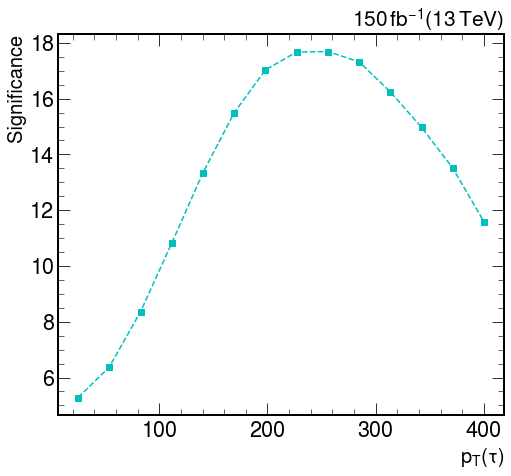

In [ ]:
#Ploting tau cuts Significance
pr.plot_significances(s = Df_s2_cut, 
                      b1 = Df_bgttbar_cut,
                      b2 = Df_bgw_cut,
                      b3 = Df_bgz_cut,
                      var = pr.pt_tau_cut,
                      w = [ex_ev_s[1]] + list(ex_ev_s[3:]),
                      rango = [25, 400, 14], 
                      txt = r'p_T(\tau)');


In [ ]:
#Applying tau's pt cut
opt = 250

No_mc = pd.Series([Df_s1_cut.shape[0],
                   Df_s2_cut.shape[0],
                   Df_s3_cut.shape[0],
                   Df_bgttbar_cut.shape[0],
                   Df_bgw_cut.shape[0],
                   Df_bgz_cut.shape[0]], index = ind)

Df_s1_cut = pr.final_cuts(Df_s1, pt_tau = opt, pt_b=0, del_phi = 0, met = 0)
Df_s2_cut = pr.final_cuts(Df_s2, pt_tau = opt, pt_b=0, del_phi = 0, met = 0)
Df_s3_cut = pr.final_cuts(Df_s3, pt_tau = opt, pt_b=0, del_phi = 0, met = 0)
Df_bgw_cut = pr.final_cuts(Df_bg_wj, pt_tau = opt, pt_b=0, del_phi = 0, met = 0)
Df_bgz_cut = pr.final_cuts(Df_bg_zj, pt_tau = opt, pt_b=0, del_phi = 0, met = 0)
Df_bgttbar_cut = pr.final_cuts(Df_bg_ttbar, pt_tau = opt, pt_b=0, del_phi = 0, met = 0)


Df_bgttbar_cut = Df_bgttbar_cut[Df_bgttbar_cut.num_b == 1]
Df_bgz_cut = Df_bgz_cut[Df_bgz_cut.num_b == 1]
Df_bgw_cut = Df_bgw_cut[Df_bgw_cut.num_b == 1]
Df_s1_cut = Df_s1_cut[Df_s1_cut.num_b == 1]
Df_s2_cut = Df_s2_cut[Df_s2_cut.num_b == 1]
Df_s3_cut = Df_s3_cut[Df_s3_cut.num_b == 1]

Nn_mc = pd.Series([Df_s1_cut.shape[0],
                   Df_s2_cut.shape[0],
                   Df_s3_cut.shape[0],
                   Df_bgttbar_cut.shape[0],
                   Df_bgw_cut.shape[0],
                   Df_bgz_cut.shape[0]], index = ind)


In [ ]:
#Eficiency of the tau cut
Nn_mc / No_mc


S600GeV     0.129084
S1000GeV    0.392570
S1600GeV    0.533990
Bg_TTbar    0.012159
Bg_WJ       0.035668
Bg_ZJ       0.278389
dtype: float64

In [ ]:
opt = 250
omet = 0

No_mc = pd.Series([Df_s1_cut.shape[0],
                   Df_s2_cut.shape[0],
                   Df_s3_cut.shape[0],
                   Df_bgttbar_cut.shape[0],
                   Df_bgw_cut.shape[0],
                   Df_bgz_cut.shape[0]], index = ind)

Df_s1_cut = pr.final_cuts(Df_s1, pt_tau = opt, pt_b=20, del_phi = 0, met = omet)
Df_s2_cut = pr.final_cuts(Df_s2, pt_tau = opt, pt_b=20, del_phi = 0, met = omet)
Df_s3_cut = pr.final_cuts(Df_s3, pt_tau = opt, pt_b=20, del_phi = 0, met = omet)
Df_bgw_cut = pr.final_cuts(Df_bg_wj, pt_tau = opt, pt_b=20, del_phi = 0, met = omet)
Df_bgz_cut = pr.final_cuts(Df_bg_zj, pt_tau = opt, pt_b=20, del_phi = 0, met = omet)
Df_bgttbar_cut = pr.final_cuts(Df_bg_ttbar, pt_tau = opt, pt_b=20, del_phi = 0, met = omet)

Df_bgttbar_cut = Df_bgttbar_cut[Df_bgttbar_cut.num_b == 1]
Df_bgz_cut = Df_bgz_cut[Df_bgz_cut.num_b == 1]
Df_bgw_cut = Df_bgw_cut[Df_bgw_cut.num_b == 1]
Df_s1_cut = Df_s1_cut[Df_s1_cut.num_b == 1]
Df_s2_cut = Df_s2_cut[Df_s2_cut.num_b == 1]
Df_s3_cut = Df_s3_cut[Df_s3_cut.num_b == 1]


Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.electron_pT < 15) | ((Df_bgz_cut.electron_pT.isna()))]
Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.electron_pT < 15) | ((Df_bgw_cut.electron_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.electron_pT < 15) | ((Df_bgttbar_cut.electron_pT.isna()))]

Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.muon_pT < 15) | ((Df_bgz_cut.muon_pT.isna()))]
Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.muon_pT < 15)     | ((Df_bgw_cut.muon_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.muon_pT < 15) | ((Df_bgttbar_cut.muon_pT.isna()))]


Df_s1_cut = Df_s1_cut[(Df_s1_cut.electron_pT < 15) | ((Df_s1_cut.electron_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.electron_pT < 15) | ((Df_s2_cut.electron_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.electron_pT < 15) | ((Df_s3_cut.electron_pT.isna()))]

Df_s1_cut = Df_s1_cut[(Df_s1_cut.muon_pT < 15) | ((Df_s1_cut.muon_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.muon_pT < 15) | ((Df_s2_cut.muon_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.muon_pT < 15) | ((Df_s3_cut.muon_pT.isna()))]

Nn_mc = pd.Series([Df_s1_cut.shape[0],
                   Df_s2_cut.shape[0],
                   Df_s3_cut.shape[0],
                   Df_bgttbar_cut.shape[0],
                   Df_bgw_cut.shape[0],
                   Df_bgz_cut.shape[0]], index = ind)

In [ ]:
#Efficiency e/mu Veto cut
Nn_mc /No_mc

S600GeV     0.995873
S1000GeV    0.997016
S1600GeV    0.995544
Bg_TTbar    0.845576
Bg_WJ       0.965591
Bg_ZJ       0.772077
dtype: float64

/content/Processor.py:515: RuntimeWarning: invalid value encountered in double_scalars
  for i in arr_range])


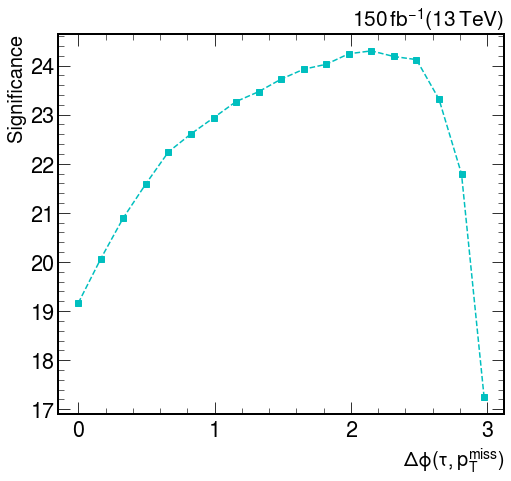

In [ ]:
pr.plot_significances(s = Df_s2_cut, 
                      b1 = Df_bgttbar_cut,
                      b2 = Df_bgw_cut,
                      b3 = Df_bgz_cut,
                      var = pr.phi_tau_cut,
                      w = [ex_ev_s[1]] + list(ex_ev_s[3:]),
                      rango = [0, np.pi, 20],
                      txt = r"\Delta\phi(\tau,p_T^{miss})");
#plt.xlabel(r'$\Delta\phi(\tau,p_T^{miss})$');

In [ ]:
opt = 250
odp = 1.5

No_mc = pd.Series([Df_s1_cut.shape[0],
                   Df_s2_cut.shape[0],
                   Df_s3_cut.shape[0],
                   Df_bgttbar_cut.shape[0],
                   Df_bgw_cut.shape[0],
                   Df_bgz_cut.shape[0]], index = ind)
Df_s1_cut = pr.final_cuts(Df_s1, pt_tau = opt, pt_b=20, del_phi = odp, met = 0)
Df_s2_cut = pr.final_cuts(Df_s2, pt_tau = opt, pt_b=20, del_phi = odp, met = 0)
Df_s3_cut = pr.final_cuts(Df_s3, pt_tau = opt, pt_b=20, del_phi = odp, met = 0)
Df_bgw_cut = pr.final_cuts(Df_bg_wj, pt_tau = opt, pt_b=20, del_phi = odp, met = 0)
Df_bgz_cut = pr.final_cuts(Df_bg_zj, pt_tau = opt, pt_b=20, del_phi = odp, met = 0)
Df_bgttbar_cut = pr.final_cuts(Df_bg_ttbar, pt_tau = opt, pt_b=20, del_phi = odp, met = 0)


Df_bgttbar_cut = Df_bgttbar_cut[Df_bgttbar_cut.num_b == 1]
Df_bgz_cut = Df_bgz_cut[Df_bgz_cut.num_b == 1]
Df_bgw_cut = Df_bgw_cut[Df_bgw_cut.num_b == 1]
Df_s1_cut = Df_s1_cut[Df_s1_cut.num_b == 1]
Df_s2_cut = Df_s2_cut[Df_s2_cut.num_b == 1]
Df_s3_cut = Df_s3_cut[Df_s3_cut.num_b == 1]


Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.electron_pT < 15) | ((Df_bgz_cut.electron_pT.isna()))]
Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.electron_pT < 15) | ((Df_bgw_cut.electron_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.electron_pT < 15) | ((Df_bgttbar_cut.electron_pT.isna()))]

Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.muon_pT < 15) | ((Df_bgz_cut.muon_pT.isna()))]
Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.muon_pT < 15)     | ((Df_bgw_cut.muon_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.muon_pT < 15) | ((Df_bgttbar_cut.muon_pT.isna()))]


Df_s1_cut = Df_s1_cut[(Df_s1_cut.electron_pT < 15) | ((Df_s1_cut.electron_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.electron_pT < 15) | ((Df_s2_cut.electron_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.electron_pT < 15) | ((Df_s3_cut.electron_pT.isna()))]

Df_s1_cut = Df_s1_cut[(Df_s1_cut.muon_pT < 15) | ((Df_s1_cut.muon_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.muon_pT < 15) | ((Df_s2_cut.muon_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.muon_pT < 15) | ((Df_s3_cut.muon_pT.isna()))]

N_ttbar2 = Df_bgttbar_cut.shape[0]
N_wpj2 = Df_bgw_cut.shape[0]
N_zpj2 = Df_bgz_cut.shape[0]

Nn_mc = pd.Series([Df_s1_cut.shape[0],
                   Df_s2_cut.shape[0],
                   Df_s3_cut.shape[0],
                   Df_bgttbar_cut.shape[0],
                   Df_bgw_cut.shape[0],
                   Df_bgz_cut.shape[0]], index = ind)

In [ ]:
#Efficiency delta phi cut
Nn_mc / No_mc

S600GeV     0.118253
S1000GeV    0.376004
S1600GeV    0.514276
Bg_TTbar    0.005688
Bg_WJ       0.014497
Bg_ZJ       0.143526
dtype: float64

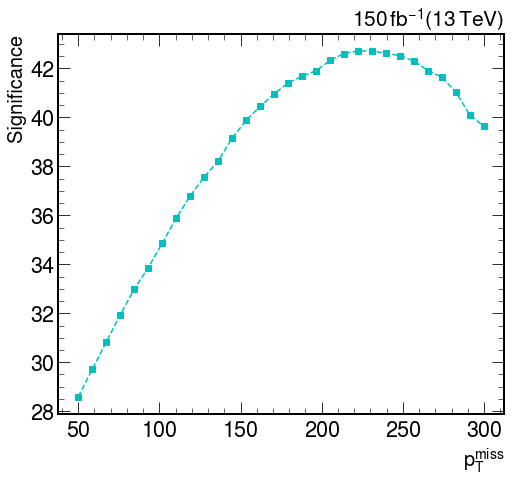

In [ ]:
pr.plot_significances(s = Df_s2_cut, 
                      b1 = Df_bgttbar_cut,
                      b2 = Df_bgw_cut,
                      b3 = Df_bgz_cut,
                      var = pr.et_met_cut,
                      w = [ex_ev_s[1]] + list(ex_ev_s[3:]),
                      rango = [50, 300, 30],
                      txt = r"p_T^{miss}")
#plt.xlabel(r'$p_T^{miss}$');

In [ ]:
opt = 250
odp = 1.5
omet = 200

No_mc = pd.Series([Df_s1_cut.shape[0],
                   Df_s2_cut.shape[0],
                   Df_s3_cut.shape[0],
                   Df_bgttbar_cut.shape[0],
                   Df_bgw_cut.shape[0],
                   Df_bgz_cut.shape[0]], index = ind)

Df_s1_cut = pr.final_cuts(Df_s1, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_s2_cut = pr.final_cuts(Df_s2, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_s3_cut = pr.final_cuts(Df_s3, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_bgw_cut = pr.final_cuts(Df_bg_wj, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_bgz_cut = pr.final_cuts(Df_bg_zj, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_bgttbar_cut = pr.final_cuts(Df_bg_ttbar, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)


Df_bgttbar_cut = Df_bgttbar_cut[Df_bgttbar_cut.num_b == 1]
Df_bgz_cut = Df_bgz_cut[Df_bgz_cut.num_b == 1]
Df_bgw_cut = Df_bgw_cut[Df_bgw_cut.num_b == 1]
Df_s1_cut = Df_s1_cut[Df_s1_cut.num_b == 1]
Df_s2_cut = Df_s2_cut[Df_s2_cut.num_b == 1]
Df_s3_cut = Df_s3_cut[Df_s3_cut.num_b == 1]


Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.electron_pT < 15) | ((Df_bgz_cut.electron_pT.isna()))]
Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.electron_pT < 15) | ((Df_bgw_cut.electron_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.electron_pT < 15) | ((Df_bgttbar_cut.electron_pT.isna()))]

Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.muon_pT < 15) | ((Df_bgz_cut.muon_pT.isna()))]
Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.muon_pT < 15)     | ((Df_bgw_cut.muon_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.muon_pT < 15) | ((Df_bgttbar_cut.muon_pT.isna()))]


Df_s1_cut = Df_s1_cut[(Df_s1_cut.electron_pT < 15) | ((Df_s1_cut.electron_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.electron_pT < 15) | ((Df_s2_cut.electron_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.electron_pT < 15) | ((Df_s3_cut.electron_pT.isna()))]

Df_s1_cut = Df_s1_cut[(Df_s1_cut.muon_pT < 15) | ((Df_s1_cut.muon_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.muon_pT < 15) | ((Df_s2_cut.muon_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.muon_pT < 15) | ((Df_s3_cut.muon_pT.isna()))]

Df_s1_cut = Df_s1_cut[(Df_s1_cut.tau2_pT < 50) | ((Df_s1_cut.tau2_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.tau2_pT < 50) | ((Df_s2_cut.tau2_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.tau2_pT < 50) | ((Df_s3_cut.tau2_pT.isna()))]

Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.tau2_pT < 50) | ((Df_bgw_cut.tau2_pT.isna()))]
Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.tau2_pT < 50) | ((Df_bgz_cut.tau2_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.tau2_pT < 50) | ((Df_bgttbar_cut.tau2_pT.isna()))]

Df_s1_cut = Df_s1_cut[(np.abs(Df_s1_cut.tau2_eta) > 2.3) | ((Df_s1_cut.tau2_eta.isna()))]
Df_s2_cut = Df_s2_cut[(np.abs(Df_s2_cut.tau2_eta) > 2.3) | ((Df_s2_cut.tau2_eta.isna()))]
Df_s3_cut = Df_s3_cut[(np.abs(Df_s3_cut.tau2_eta) > 2.3) | ((Df_s3_cut.tau2_eta.isna()))]

Df_bgw_cut = Df_bgw_cut[(np.abs(Df_bgw_cut.tau2_eta) > 2.3) | ((Df_bgw_cut.tau2_eta.isna()))]
Df_bgz_cut = Df_bgz_cut[(np.abs(Df_bgz_cut.tau2_eta) > 2.3) | ((Df_bgz_cut.tau2_eta.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(np.abs(Df_bgttbar_cut.tau2_eta) > 2.3) | ((Df_bgttbar_cut.tau2_eta.isna()))]

Nn_mc = pd.Series([Df_s1_cut.shape[0],
                   Df_s2_cut.shape[0],
                   Df_s3_cut.shape[0],
                   Df_bgttbar_cut.shape[0],
                   Df_bgw_cut.shape[0],
                   Df_bgz_cut.shape[0]], index = ind)


df = pd.DataFrame(ex_ev_s, columns = ["expected_events"])
df['First_Selection'] = np.array([Df_s1.shape[0], Df_s2.shape[0], Df_s3.shape[0],
                                  Df_bg_ttbar.shape[0], Df_bg_wj.shape[0], Df_bg_zj.shape[0]]) #* ex_ev_s
df['Second_Selection'] = np.array([Df_s1_cut.shape[0], Df_s2_cut.shape[0], Df_s3_cut.shape[0], 
                                   Df_bgttbar_cut.shape[0], Df_bgw_cut.shape[0], Df_bgz_cut.shape[0]]) #* ex_ev_s
df

,expected_events,First_Selection,Second_Selection
S2 TeV,0.036690,6476,2723
S2.5 TeV,0.011250,6085,2470
S3 TeV,0.004170,5738,2049
Bg_TTbar,3.114478,1417003,356
Bg_WJ,0.274976,15832,104
Bg_ZJ,0.035780,4742,78


In [ ]:
#Met Efficiency
Nn_mc / No_mc

S2 TeV      0.494731
S2.5 TeV    0.479798
S3 TeV      0.418249
Bg_TTbar    0.000478
Bg_WJ       0.007977
Bg_ZJ       0.018263
dtype: float64

In [ ]:
df = pd.DataFrame(ex_ev_s, columns = ["expected_events"])
df['First_Selection'] = np.array([Df_s1.shape[0], Df_s2.shape[0], Df_s3.shape[0],
                                  Df_bg_ttbar.shape[0], Df_bg_wj.shape[0], Df_bg_zj.shape[0]]) * ex_ev_s
df['Second_Selection'] = np.array([Df_s1_cut.shape[0], Df_s2_cut.shape[0], Df_s3_cut.shape[0], 
                                   Df_bgttbar_cut.shape[0], Df_bgw_cut.shape[0], Df_bgz_cut.shape[0]]) * ex_ev_s 
df

,expected_events,First_Selection,Second_Selection
S2 TeV,0.036690,2.376044e+02,99.906870
S2.5 TeV,0.011250,6.845625e+01,27.787500
S3 TeV,0.004170,2.392746e+01,8.544330
Bg_TTbar,3.114478,4.413225e+06,1108.754236
Bg_WJ,0.274976,4.353414e+03,28.597461
Bg_ZJ,0.035780,1.696700e+02,2.790860


# Plotting and Results

The plots cells are:
1. Plots for the first 3 jets kinematic variables.
2. Plots for the Met variables before the selection.
3. Plots for the Met variables after the selection.
4. Plots for the kinematic variables of $\tau_h$ and $b_{jet}$.
5. Mass spectras.

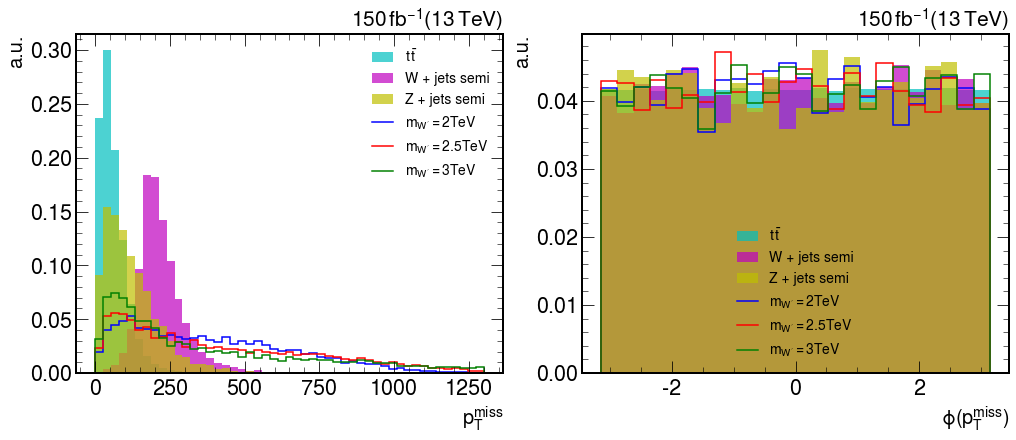

In [ ]:
pr.plot_Met_ET_Phi2(df1 = Df_s1, 
                    df2 = Df_s2, 
                    df3 = Df_s3, 
                    bg2 = Df_bg_wj, 
                    bg3 = Df_bg_zj, 
                    bg1 = Df_bg_ttbar,
                    size = 14,
                    labels = labels)


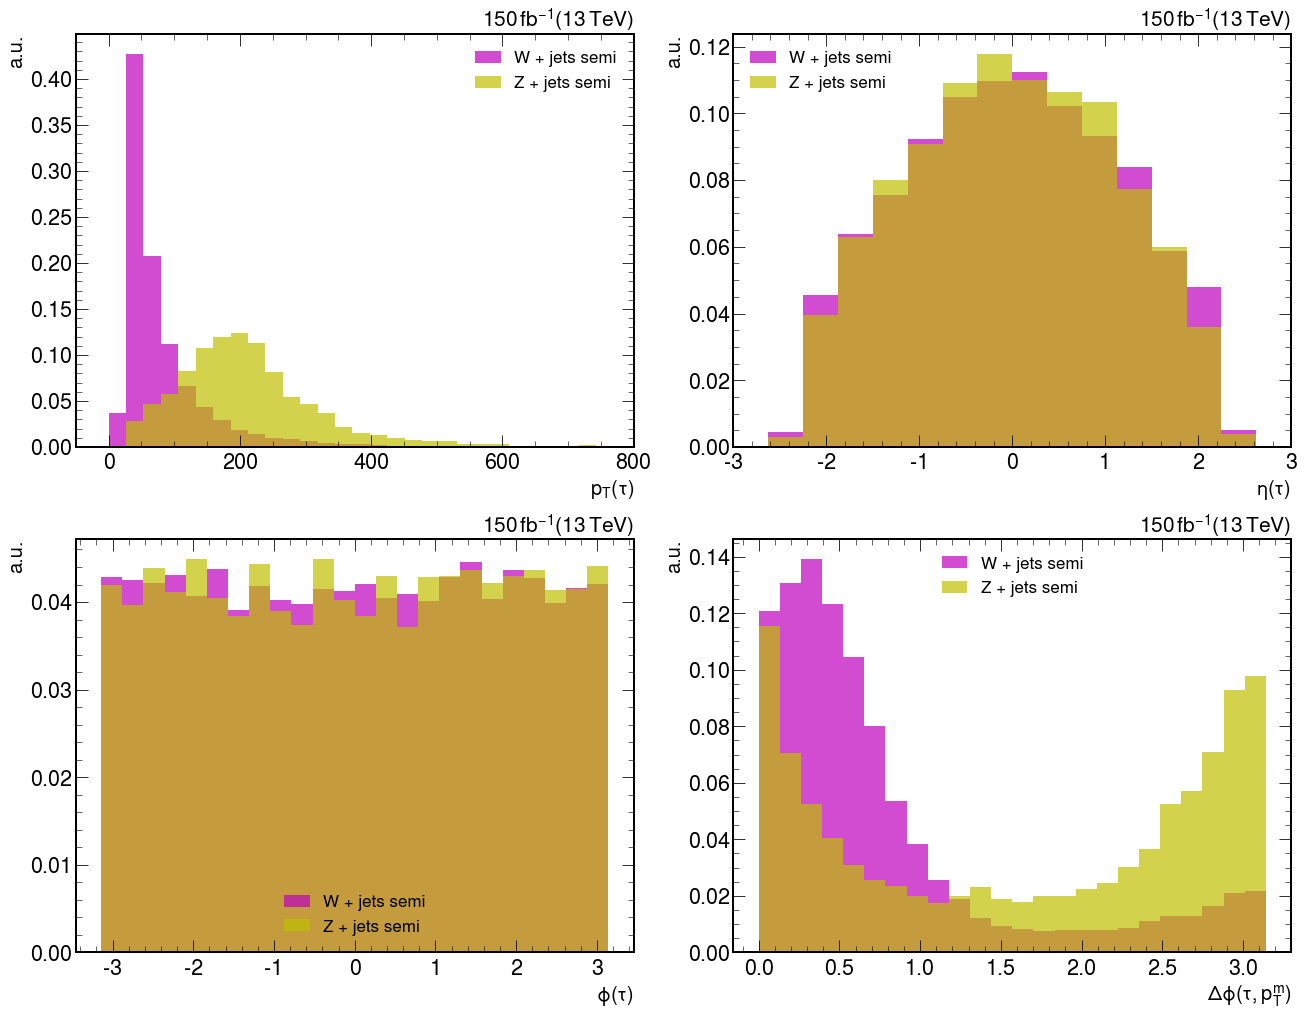

In [ ]:
#Pt Eta phi and delta phi with met for the b
pr.plot_pt_eta_phi2_2(labels= labels,
                      obj = "tau1",
                      bg2 = Df_bg_wj, 
                      bg3 = Df_bg_zj, 
                      size = 17)

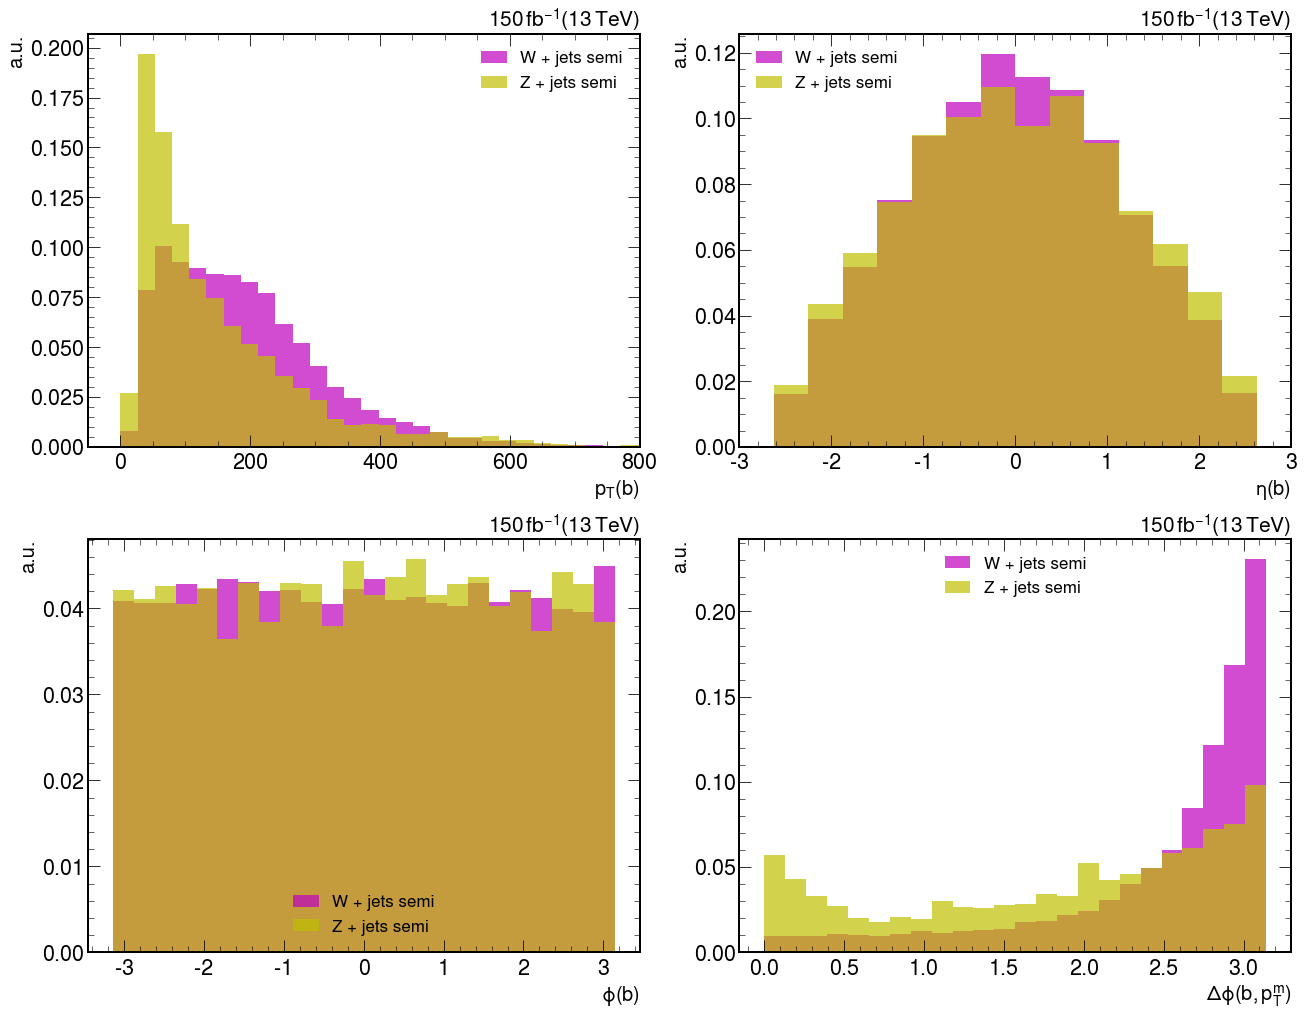

In [ ]:
#Pt Eta phi and delta phi with met for the b
pr.plot_pt_eta_phi2_2(labels= labels,
                 obj = "b", 
                 bg2 = Df_bg_wj, 
                 bg3 = Df_bg_zj, 
                 size = 17)

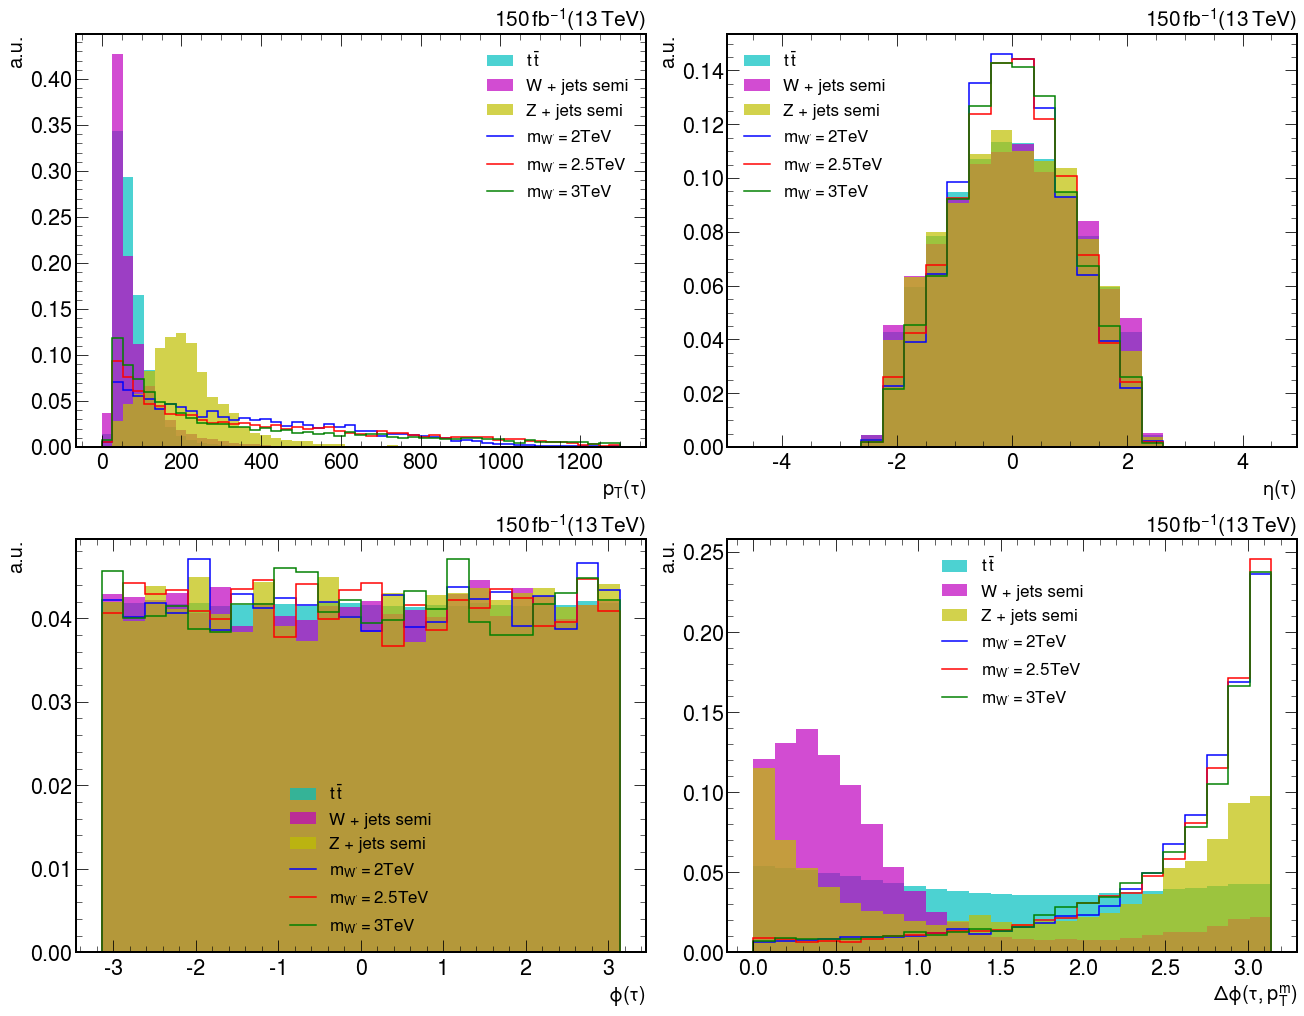

In [ ]:
#Pt Eta phi and delta phi with met for the tau
pr.plot_pt_eta_phi2(labels= labels,
                    obj = "tau1", 
                    df1 = Df_s1, 
                    df2 = Df_s2, 
                    df3 = Df_s3,
                    bg2 = Df_bg_wj, 
                    bg3 = Df_bg_zj, 
                    bg1 = Df_bg_ttbar,
                    size = 17)

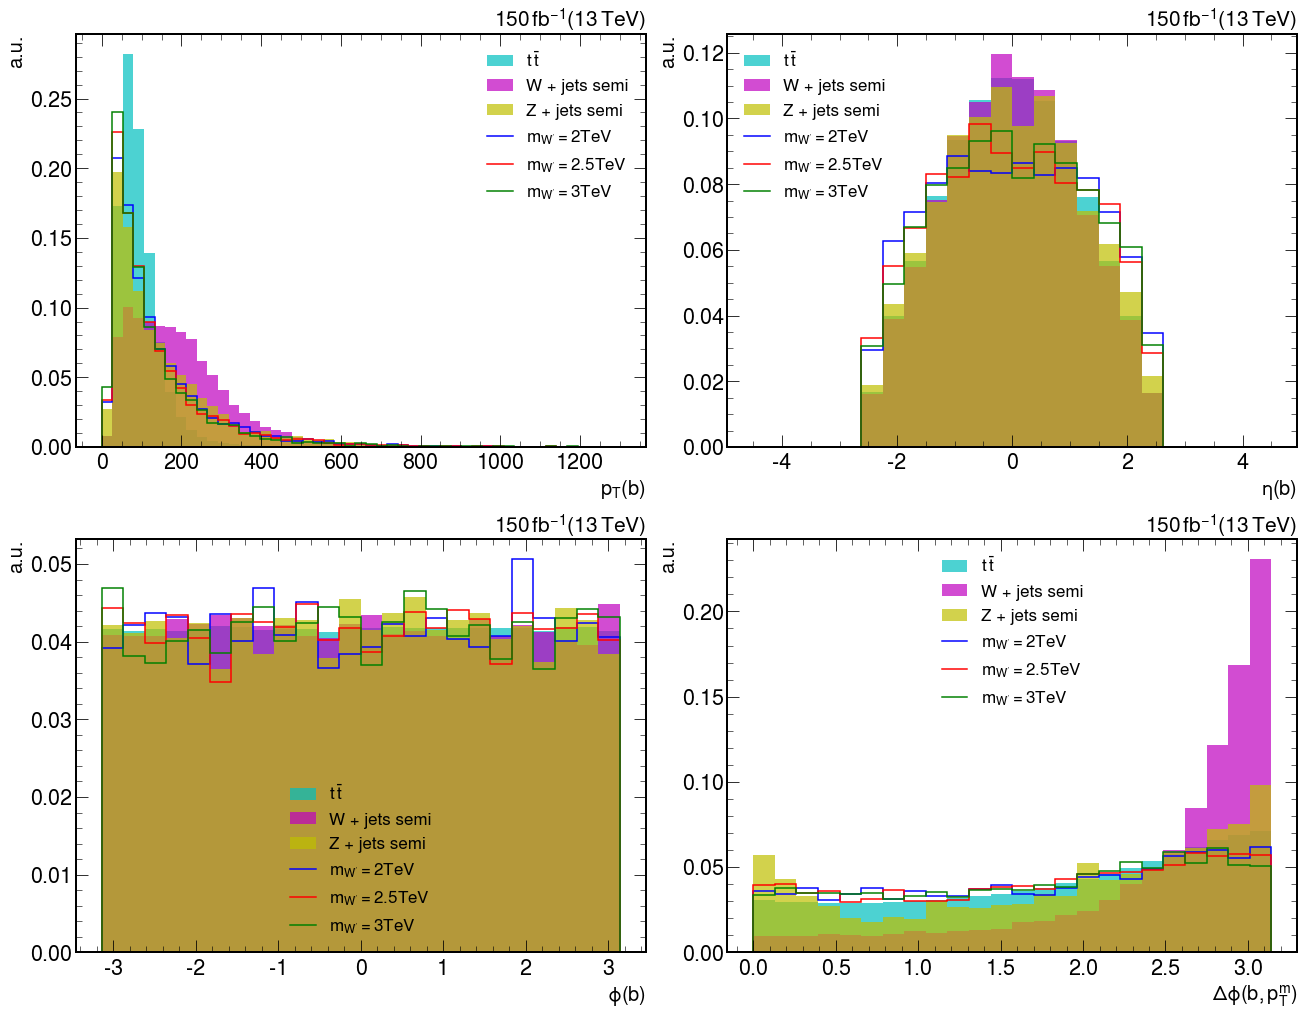

In [ ]:
#Pt Eta phi and delta phi with met for the b
pr.plot_pt_eta_phi2(labels= labels,
                    obj = "b", 
                    df1 = Df_s1, 
                    df2 = Df_s2, 
                    df3 = Df_s3,
                    bg2 = Df_bg_wj, 
                    bg3 = Df_bg_zj, 
                    bg1 = Df_bg_ttbar,
                    size = 17)

In [ ]:
def Binner(m_type,s1,s2,s3,bg1,bg2,bg3, Ws, labels, bines = [30], labs_sizes = 20):
    """
    Returns a mass distributions values for 3 signals and 3 backgrounds
    Parameters:
        m_type: A string that will serve for the plot's x_label.
        s1 : Signal#1, a series or iterable to be binned.
        s2 : Signal#2, a series or iterable to be binned.
        s3 : Signal#3, a series or iterable to be binned.
        bg1 : Background#1, a series or iterable to be binned.
        bg2 : Background#2, a series or iterable to be binned.
        bg3 : Background#3, a series or iterable to be binned.
        Ws : The weights of the signal and background 
             in the order they are implemented in the function.
        labels : Labels to recognize the histograms. Must be a iterable of strings.
        bines : bins for each histogram. Eachone must be a iterable of the edges of the bins
                ordered betweeen the minimun and the maximun value of the histograms
             
    """

    h1, binss1 = np.histogram(s1, bines)
    h2, binss2 = np.histogram(s2, bines)
    h3, binss3 = np.histogram(s3, bines)

    h4, binsb1 = np.histogram(bg1, bines)
    h5, binsb2 = np.histogram(bg2, bines)
    h6, binsb3 = np.histogram(bg3, bines)

    df = pd.DataFrame([h1 * Ws[0]/ s1.shape[0],
                       h2 * Ws[1]/ s2.shape[0],
                       h3 * Ws[2]/ s3.shape[0],
                       h4 * Ws[3]/ bg1.shape[0], 
                       h5 * Ws[4] /bg2.shape[0], 
                       h6 * Ws[5] /bg3.shape[0]],
                     index = labels)
    return df, binss1

def plot_mass1(m_type,s1,s2,s3,bg1,bg2,bg3, Ws, labels, bines = [30], labs_sizes = 20):
    """
    Returns a mass distributions for 3 signals and tree backgrounds
    Parameters:
        m_type: A string that will serve for the plot's x_label.
        s1 : Signal#1, a series or iterable to be binned.
        s2 : Signal#2, a series or iterable to be binned.
        s3 : Signal#3, a series or iterable to be binned.
        bg1 : Background#1, a series or iterable to be binned.
        bg2 : Background#2, a series or iterable to be binned.
        bg3 : Background#3, a series or iterable to be binned.
        Ws : The weights of the signal and background 
             in the order they are implemented in the function.
        labels : Labels to recognize the histograms. Must be a iterable of strings.
        bines : bins for each histogram. Eachone must be a iterable of the edges of the bins
                ordered betweeen the minimun and the maximun value of the histograms
             
    """
    f, axs = plt.subplots( figsize=(9, 7))

    h1, binss1 = np.histogram(s1, bines)
    h2, binss2 = np.histogram(s2, bines)
    h3, binss3 = np.histogram(s3, bines)

    h4, binsb1 = np.histogram(bg1, bines)
    h5, binsb2 = np.histogram(bg2, bines)
    h6, binsb3 = np.histogram(bg3, bines)

    
    hep.histplot([h4 * Ws[3]/ bg1.shape[0], h5 * Ws[4] /bg2.shape[0], h6 * Ws[5] /bg3.shape],
                 bins = binss3, 
                 ax = axs,
                 color = ['c', 'm', 'y'],  
                 stack = True, 
                 histtype = 'fill', 
                 label = labels[3:],
                 sort='label_l')
    
    hep.histplot((h6 * Ws[5]/ bg3.shape[0]) + (h5 * Ws[4]/ bg2.shape[0]) + (h4 * Ws[3]/ bg1.shape[0]),
                 bins = binss3,
                 ax=axs, 
                 histtype='errorbar',
                 #hatch = '///',
                 yerr=True, 
                 c='black',
                 marker="",
                 capsize=4)
                 #label = 'background err')
    
    hep.histplot(h1 * Ws[0]/ s1.shape[0],
                 bins = binss1,
                 ax = axs,
                 yerr = True,
                 color = 'b',
                 histtype = 'step',  
                 label = labels[0])
    hep.histplot(h2 * Ws[1]/ s2.shape[0],
                 bins = binss1,
                 ax = axs,
                 yerr = True,
                 color = 'r',
                 histtype = 'step',  
                 label = labels[1])
    hep.histplot(h3 * Ws[2]/ s3.shape[0],
                 bins = binss1,
                 ax = axs,
                 yerr = True,
                 color = 'g',
                 histtype = 'step',  
                 label = labels[2])

    #hep.cms.label()
    axs.set_xlabel(m_type, fontsize = labs_sizes)
    axs.set_ylabel('Events',fontsize = labs_sizes)
    axs.set_yscale("log")
    axs.legend(fontsize = 'xx-small', loc = 'upper right')
    axs.set_title(r'$150 \,fb^{-1}(13 \,TeV)$', loc = 'right', fontsize = labs_sizes + 1)

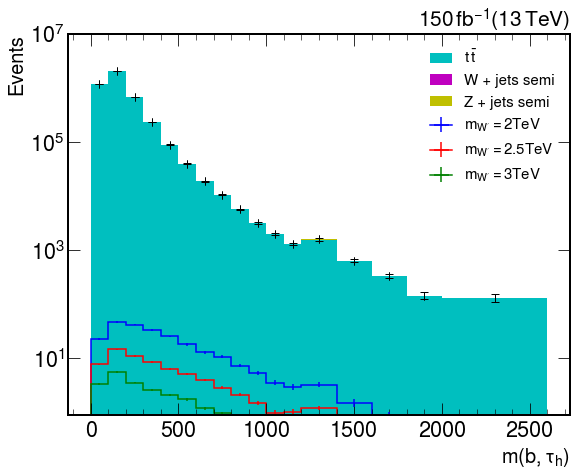

In [ ]:
#Invariant Mass between tau, b without cuts
m_tau_b1 = pr.generate_ploteable_invariant_masses(Df_s1,Df_s2, Df_s3)
m_tau_bg = pr.generate_ploteable_invariant_masses(Df_bg_ttbar, Df_bg_wj, Df_bg_zj)
Df_s1['Invariant_mass_tau_b'], Df_s2['Invariant_mass_tau_b'], Df_s3['Invariant_mass_tau_b'] = m_tau_b1
Df_bg_ttbar['Invariant_mass_tau_b'], Df_bg_wj['Invariant_mass_tau_b'], Df_bg_zj['Invariant_mass_tau_b'] = m_tau_bg

pr.plot_mass1(m_type = r'$m(b,\tau_h)$',
              s1 = Df_s1['Invariant_mass_tau_b'],
              s2 = Df_s2['Invariant_mass_tau_b'],
              s3 = Df_s3['Invariant_mass_tau_b'],
              bg1 = Df_bg_ttbar['Invariant_mass_tau_b'],
              bg2 = Df_bg_wj['Invariant_mass_tau_b'],
              bg3 = Df_bg_zj['Invariant_mass_tau_b'],
              Ws = df.First_Selection,
              labels= labels,
              bines = [i for i in range(0,1200,100)] + [i for i in range(1200, 2200,200)]+[2600])
plt.ylim(0.9,1e7);

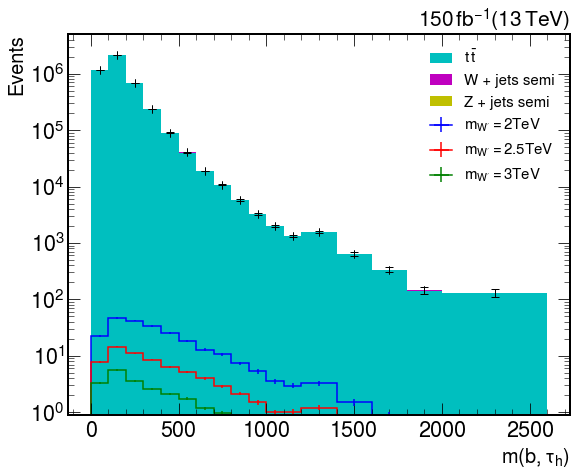

In [ ]:
#Invariant Mass between tau, b without cuts
m_tau_b1 = pr.generate_ploteable_invariant_masses(Df_s1,Df_s2, Df_s3)
m_tau_bg = pr.generate_ploteable_invariant_masses(Df_bg_ttbar, Df_bg_wj, Df_bg_zj)
Df_s1['Invariant_mass_tau_b'], Df_s2['Invariant_mass_tau_b'], Df_s3['Invariant_mass_tau_b'] = m_tau_b1
Df_bg_ttbar['Invariant_mass_tau_b'], Df_bg_wj['Invariant_mass_tau_b'], Df_bg_zj['Invariant_mass_tau_b'] = m_tau_bg

pr.plot_mass1(m_type = r'$m(b,\tau_h)$',
              s1 = Df_s1['Invariant_mass_tau_b'],
              s2 = Df_s2['Invariant_mass_tau_b'],
              s3 = Df_s3['Invariant_mass_tau_b'],
              bg1 = Df_bg_ttbar['Invariant_mass_tau_b'],
              bg2 = Df_bg_wj['Invariant_mass_tau_b'],
              bg3 = Df_bg_zj['Invariant_mass_tau_b'],
              Ws = df.First_Selection,
              labels= labels,
              bines = [i for i in range(0,1200,100)] + [i for i in range(1200, 2200,200)]+[2600])
            
plt.ylim(0.9,5e6);

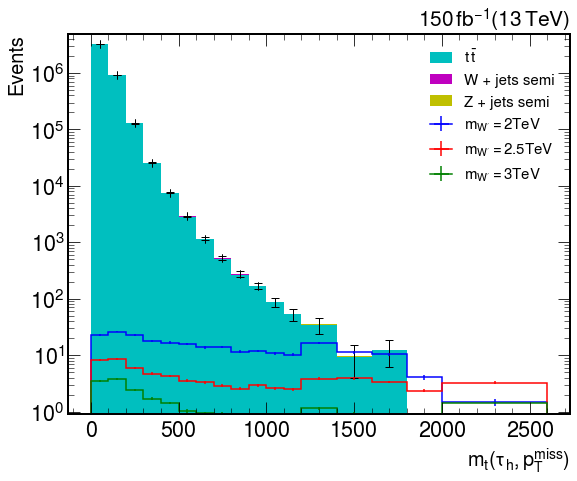

In [ ]:
#Transverse mass of tau without cuts
m_trvs_tau_nu1 = pr.generate_ploteable_tr_tau_nu_masses(Df_s1,Df_s2, Df_s3)
m_trvs_tau_nu2 = pr.generate_ploteable_tr_tau_nu_masses(Df_bg_ttbar, Df_bg_wj,Df_bg_zj)
Df_s1['Transverse_mass_tau'], Df_s2['Transverse_mass_tau'], Df_s3['Transverse_mass_tau'] = m_trvs_tau_nu1
Df_bg_ttbar['Transverse_mass_tau'], Df_bg_wj['Transverse_mass_tau'], Df_bg_zj['Transverse_mass_tau'] = m_trvs_tau_nu2

pr.plot_mass1(m_type = r'$m_t(\tau_h, p_T^{miss})$',
              s1 = Df_s1['Transverse_mass_tau'],
              s2 = Df_s2['Transverse_mass_tau'],
              s3 = Df_s3['Transverse_mass_tau'],
              bg1 = Df_bg_ttbar['Transverse_mass_tau'],
              bg2 = Df_bg_wj['Transverse_mass_tau'],
              bg3 = Df_bg_zj['Transverse_mass_tau'],
              Ws = df.First_Selection,
              labels= labels,
              bines = [i for i in range(0,1200,100)] + [i for i in range(1200, 2200,200)]+[2600])
plt.ylim(0.9,5e6);

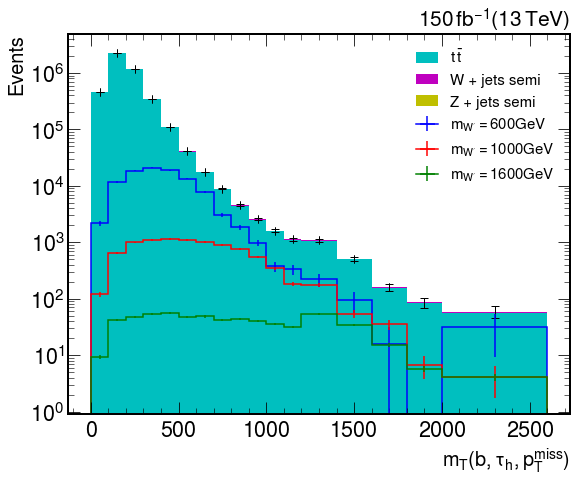

In [ ]:
#Total mass between b tau nu without cuts
m_T1 = pr.generate_ploteable_total_masses(Df_s1, Df_s2, Df_s3)
m_Tbg = pr.generate_ploteable_total_masses(Df_bg_ttbar, Df_bg_wj, Df_bg_zj)
Df_s1['Total_mass'], Df_s2['Total_mass'], Df_s3['Total_mass'] = m_T1
Df_bg_ttbar['Total_mass'], Df_bg_wj['Total_mass'], Df_bg_zj['Total_mass'] = m_Tbg


pr.plot_mass1(m_type = r'$m_T(b,\tau_h, p_T^{miss})$',
              s1 = Df_s1['Total_mass'],
              s2 = Df_s2['Total_mass'],
              s3 = Df_s3['Total_mass'],
              bg1 = Df_bg_ttbar['Total_mass'],
              bg2 = Df_bg_wj['Total_mass'],
              bg3 = Df_bg_zj['Total_mass'],
              Ws = df.First_Selection,
              labels= labels,
              bines = [i for i in range(0,1200,100)] + [i for i in range(1200, 2200,200)]+[2600])

plt.ylim(0.9,5e6);

In [ ]:
opt = 250
odp = 1.5
omet = 200

#opt = 80
#odp = 2.4
#omet = 140

Df_s1_cut = pr.final_cuts(Df_s1, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_s2_cut = pr.final_cuts(Df_s2, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_s3_cut = pr.final_cuts(Df_s3, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_bgw_cut = pr.final_cuts(Df_bg_wj, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_bgz_cut = pr.final_cuts(Df_bg_zj, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_bgttbar_cut = pr.final_cuts(Df_bg_ttbar, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)


Df_bgttbar_cut = Df_bgttbar_cut[Df_bgttbar_cut.num_b == 1]
Df_bgz_cut = Df_bgz_cut[Df_bgz_cut.num_b == 1]
Df_bgw_cut = Df_bgw_cut[Df_bgw_cut.num_b == 1]
Df_s1_cut = Df_s1_cut[Df_s1_cut.num_b == 1]
Df_s2_cut = Df_s2_cut[Df_s2_cut.num_b == 1]
Df_s3_cut = Df_s3_cut[Df_s3_cut.num_b == 1]


Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.electron_pT < 15) | ((Df_bgz_cut.electron_pT.isna()))]
Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.electron_pT < 15) | ((Df_bgw_cut.electron_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.electron_pT < 15) | ((Df_bgttbar_cut.electron_pT.isna()))]

Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.muon_pT < 15) | ((Df_bgz_cut.muon_pT.isna()))]
Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.muon_pT < 15)     | ((Df_bgw_cut.muon_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.muon_pT < 15) | ((Df_bgttbar_cut.muon_pT.isna()))]


Df_s1_cut = Df_s1_cut[(Df_s1_cut.electron_pT < 15) | ((Df_s1_cut.electron_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.electron_pT < 15) | ((Df_s2_cut.electron_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.electron_pT < 15) | ((Df_s3_cut.electron_pT.isna()))]

Df_s1_cut = Df_s1_cut[(Df_s1_cut.muon_pT < 15) | ((Df_s1_cut.muon_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.muon_pT < 15) | ((Df_s2_cut.muon_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.muon_pT < 15) | ((Df_s3_cut.muon_pT.isna()))]

Df_s1_cut = Df_s1_cut[(Df_s1_cut.tau2_pT < 50) | ((Df_s1_cut.tau2_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.tau2_pT < 50) | ((Df_s2_cut.tau2_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.tau2_pT < 50) | ((Df_s3_cut.tau2_pT.isna()))]

Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.tau2_pT < 50) | ((Df_bgw_cut.tau2_pT.isna()))]
Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.tau2_pT < 50) | ((Df_bgz_cut.tau2_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.tau2_pT < 50) | ((Df_bgttbar_cut.tau2_pT.isna()))]

Df_s1_cut = Df_s1_cut[(np.abs(Df_s1_cut.tau2_eta) > 2.3) | ((Df_s1_cut.tau2_eta.isna()))]
Df_s2_cut = Df_s2_cut[(np.abs(Df_s2_cut.tau2_eta) > 2.3) | ((Df_s2_cut.tau2_eta.isna()))]
Df_s3_cut = Df_s3_cut[(np.abs(Df_s3_cut.tau2_eta) > 2.3) | ((Df_s3_cut.tau2_eta.isna()))]

Df_bgw_cut = Df_bgw_cut[(np.abs(Df_bgw_cut.tau2_eta) > 2.3) | ((Df_bgw_cut.tau2_eta.isna()))]
Df_bgz_cut = Df_bgz_cut[(np.abs(Df_bgz_cut.tau2_eta) > 2.3) | ((Df_bgz_cut.tau2_eta.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(np.abs(Df_bgttbar_cut.tau2_eta) > 2.3) | ((Df_bgttbar_cut.tau2_eta.isna()))]


df = pd.DataFrame(ex_ev_s, columns = ["expected_events"])
df['First_Selection'] = np.array([Df_s1.shape[0], Df_s2.shape[0], Df_s3.shape[0],
                                  Df_bg_ttbar.shape[0], Df_bg_wj.shape[0], Df_bg_zj.shape[0]]) 
df['Second_Selection'] = np.array([Df_s1_cut.shape[0], Df_s2_cut.shape[0], Df_s3_cut.shape[0], 
                                   Df_bgttbar_cut.shape[0], Df_bgw_cut.shape[0], Df_bgz_cut.shape[0]]) 
df['Cociente'] = df["Second_Selection"] / df['First_Selection']

df

,expected_events,First_Selection,Second_Selection,Cociente
S2 TeV,0.036690,6476,2723,0.420476
S2.5 TeV,0.011250,6085,2470,0.405916
S3 TeV,0.004170,5738,2049,0.357093
Bg_TTbar,3.114478,1417003,356,0.000251
Bg_WJ,0.274976,15832,104,0.006569
Bg_ZJ,0.035780,4742,78,0.016449


In [ ]:
df = pd.DataFrame(ex_ev_s, columns = ["expected_events"])
df['First_Selection'] = np.array([Df_s1.shape[0], Df_s2.shape[0], Df_s3.shape[0],
                                  Df_bg_ttbar.shape[0], Df_bg_wj.shape[0], Df_bg_zj.shape[0]]) *ex_ev_s 
df['Second_Selection'] = np.array([Df_s1_cut.shape[0], Df_s2_cut.shape[0], Df_s3_cut.shape[0], 
                                   Df_bgttbar_cut.shape[0], Df_bgw_cut.shape[0], Df_bgz_cut.shape[0]]) *ex_ev_s
#df['Cociente'] = df["Second_Selection"] / df['First_Selection']

df

,expected_events,First_Selection,Second_Selection
S2 TeV,0.036690,2.376044e+02,99.906870
S2.5 TeV,0.011250,6.845625e+01,27.787500
S3 TeV,0.004170,2.392746e+01,8.544330
Bg_TTbar,3.114478,4.413225e+06,1108.754236
Bg_WJ,0.274976,4.353414e+03,28.597461
Bg_ZJ,0.035780,1.696700e+02,2.790860


In [ ]:
N_mc1 = np.array([Df_s1.shape[0], Df_s2.shape[0], Df_s3.shape[0],
                  Df_bg_ttbar.shape[0], Df_bg_wj.shape[0], Df_bg_zj.shape[0]])
N_mc2 = np.array([Df_s1_cut.shape[0], Df_s2_cut.shape[0], Df_s3_cut.shape[0], 
                  Df_bgttbar_cut.shape[0], Df_bgw_cut.shape[0], Df_bgz_cut.shape[0]])

s_err1 = pd.Series(ex_ev_s *(N_mc1)**0.5, name = "First_Selection")
s_err2 = pd.Series(ex_ev_s *(N_mc2)**0.5, name = "Second_Selection")
s_err2

S2 TeV       1.914571
S2.5 TeV     0.559115
S3 TeV       0.188759
Bg_TTbar    58.763857
Bg_WJ        2.804212
Bg_ZJ        0.316003
Name: Second_Selection, dtype: float64

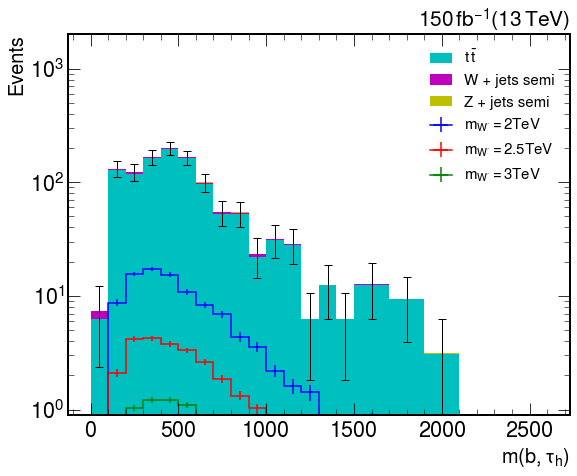

In [ ]:
# Invariant Mass between tau, b with cuts

pr.plot_mass1(m_type = r'$m(b,\tau_h)$',
              s1 = Df_s1_cut['Invariant_mass_tau_b'],
              s2 = Df_s2_cut['Invariant_mass_tau_b'],
              s3 = Df_s3_cut['Invariant_mass_tau_b'],
              bg1 = Df_bgttbar_cut['Invariant_mass_tau_b'],
              bg2 = Df_bgw_cut['Invariant_mass_tau_b'],
              bg3 = Df_bgttbar_cut['Invariant_mass_tau_b'],
              Ws = df.Second_Selection,
              labels= labels,
              bines = [i for i in range(0,1500,100)] + [i for i in range(1500, 2200,200)]+[2600])
plt.ylim(0.9,2000);

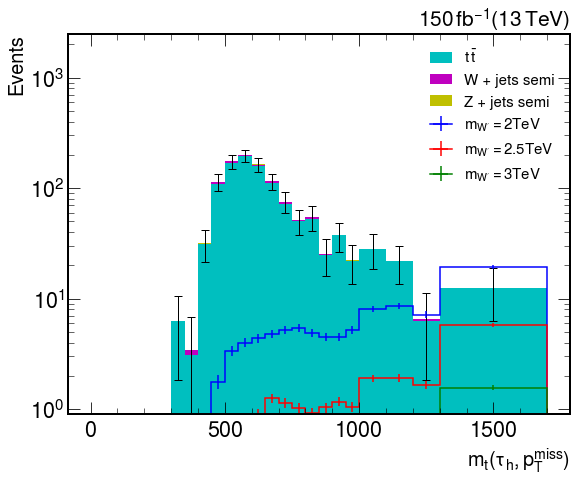

In [ ]:
#Transverse mass of tau with cuts

pr.plot_mass1(m_type = r'$m_t(\tau_h, p_T^{miss})$',
              s1 = Df_s1_cut['Transverse_mass_tau'],
              s2 = Df_s2_cut['Transverse_mass_tau'],
              s3 = Df_s3_cut['Transverse_mass_tau'],
              bg1 = Df_bgttbar_cut['Transverse_mass_tau'],
              bg2 = Df_bgw_cut['Transverse_mass_tau'],
              bg3 = Df_bgz_cut['Transverse_mass_tau'],
              Ws = df.Second_Selection,
              labels= labels,
              bines = [i for i in range(0,1000,50)] + [i for i in range(1000, 1400,100)]+[1700])

#plt.xlim(200,1700)
plt.ylim(0.9,2.5e3);



In [ ]:
df

,expected_events,First_Selection,Second_Selection
S2 TeV,0.036690,2.376044e+02,99.906870
S2.5 TeV,0.011250,6.845625e+01,27.787500
S3 TeV,0.004170,2.392746e+01,8.544330
Bg_TTbar,3.114478,4.413225e+06,1108.754236
Bg_WJ,0.274976,4.353414e+03,28.597461
Bg_ZJ,0.035780,1.696700e+02,2.790860


In [ ]:
df_mt, bines, errs = pr.Binner(m_type = r'$m_t(\tau_h, p_T^{miss})$',
                               s1 = Df_s1_cut['Transverse_mass_tau'],
                               s2 = Df_s2_cut['Transverse_mass_tau'],
                               s3 = Df_s3_cut['Transverse_mass_tau'],
                               bg1 = Df_bgttbar_cut['Transverse_mass_tau'],
                               bg2 = Df_bgw_cut['Transverse_mass_tau'],
                               bg3 = Df_bgz_cut['Transverse_mass_tau'],
                               Ws = df.Second_Selection,
                               labels= labels,
                               bines = [i for i in range(0,1200,50)] + [i for i in range(1200, 1400,100)]+[1700])

In [ ]:
errs.iloc[0,:].values

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08204133, 0.10377499, 0.25419578,
       0.35191812, 0.38305485, 0.40024065, 0.41993624, 0.43721181,
       0.44635311, 0.42471746, 0.40691178, 0.40691178, 0.43566961,
       0.3669    , 0.40191881, 0.40856255, 0.38305485, 0.51234797,
       0.84466723])

In [ ]:
#bines
#df_mt.iloc[5,:].sum()

pr.NpRootConverter("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/Roots_Andres/SSM_WP_2000GeV_Transverse_Mass", 
                   "mass_histogram", 
                   bines, 
                   df_mt.iloc[0,:].values, 
                   errs.iloc[0,:].values)
pr.NpRootConverter("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/Roots_Andres/SSM_WP_2500GeV_Transverse_Mass", 
                   "mass_histogram", 
                   bines, 
                   df_mt.iloc[1,:].values, 
                   errs.iloc[1,:].values)
pr.NpRootConverter("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/Roots_Andres/SSM_WP_3000GeV_Transverse_Mass", 
                   "mass_histogram", 
                   bines, 
                   df_mt.iloc[2,:].values, 
                   errs.iloc[2,:].values)
pr.NpRootConverter("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/Roots_Andres/ttbar_SSM_cuts_Transverse_Mass", 
                   "mass_histogram", 
                   bines, 
                   df_mt.iloc[3,:].values, 
                   errs.iloc[3,:].values)
pr.NpRootConverter("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/Roots_Andres/W_plus_jets_SSM_cuts_Transverse_Mass", 
                   "mass_histogram", 
                   bines, 
                   df_mt.iloc[4,:].values, 
                   errs.iloc[4,:].values)
pr.NpRootConverter("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/Roots_Andres/Z_plus_jets_SSM_cuts_Transverse_Mass", 
                   "mass_histogram", 
                   bines, 
                   df_mt.iloc[5,:].values, 
                   errs.iloc[5,:].values)

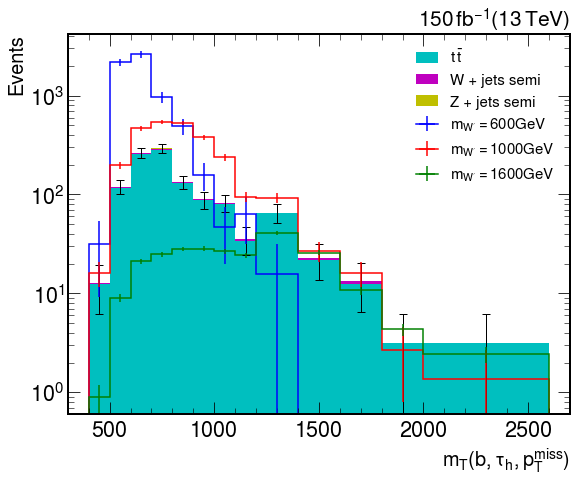

In [ ]:
pr.plot_mass1(m_type = r'$m_T(b,\tau_h, p_T^{miss})$',
              s1 = Df_s1_cut['Total_mass'],
              s2 = Df_s2_cut['Total_mass'],
              s3 = Df_s3_cut['Total_mass'],
              bg1 = Df_bgttbar_cut['Total_mass'],
              bg2 = Df_bgz_cut['Total_mass'],
              bg3 = Df_bgz_cut['Total_mass'],
              Ws = df.Second_Selection,
              labels= labels,
              bines = [i for i in range(0,1200,100)] + [i for i in range(1200, 2200,200)]+[2600])

plt.xlim(300,2700);

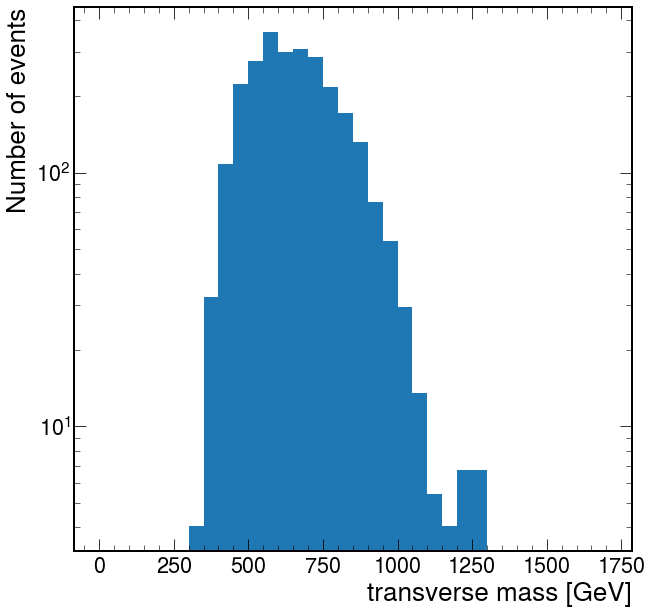

In [ ]:
hist, bin_edges = uproot.open('/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/Roots_Andres/SSM_WP_1000GeV_Transverse_Mass.root')['mass_histogram'].to_numpy()
plt.stairs(hist, bin_edges, fill=True)
plt.xlabel('transverse mass [GeV]')
plt.ylabel('Number of events')
plt.yscale('log');